In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# reads in the training dataset
train = pd.read_csv("earnings_train.csv")

# reads in the test dataset
test = pd.read_csv("earnings_test_features.csv")

train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20705 entries, 0 to 20704
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT_TYPE       20705 non-null  object 
 1   DISTRICT_NAME       20705 non-null  object 
 2   DISTRICT_CODE       17960 non-null  float64
 3   ACADEMIC_YEAR       20705 non-null  object 
 4   DEMO_CATEGORY       20705 non-null  object 
 5   STUDENT_POPULATION  20705 non-null  object 
 6   AWARD_CATEGORY      20705 non-null  object 
 7   WAGE_YEAR1          20705 non-null  float64
 8   WAGE_YEAR2          20705 non-null  float64
 9   WAGE_YEAR3          20705 non-null  float64
 10  WAGE_YEAR4          20705 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB


,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
count,1.796000e+04,20705.000000,20705.000000,20705.000000,20705.000000
mean,3.041331e+06,4476.106834,6075.533253,7310.831635,8530.890413
std,1.583286e+06,11944.502346,16140.916903,19158.203471,22106.663179
min,1.100170e+05,0.000000,0.000000,0.000000,0.000000
25%,1.864089e+06,0.000000,0.000000,0.000000,0.000000
50%,3.166852e+06,0.000000,0.000000,0.000000,0.000000
75%,4.277214e+06,0.000000,0.000000,0.000000,0.000000
max,5.872769e+06,97993.000000,132847.000000,146728.000000,153910.000000


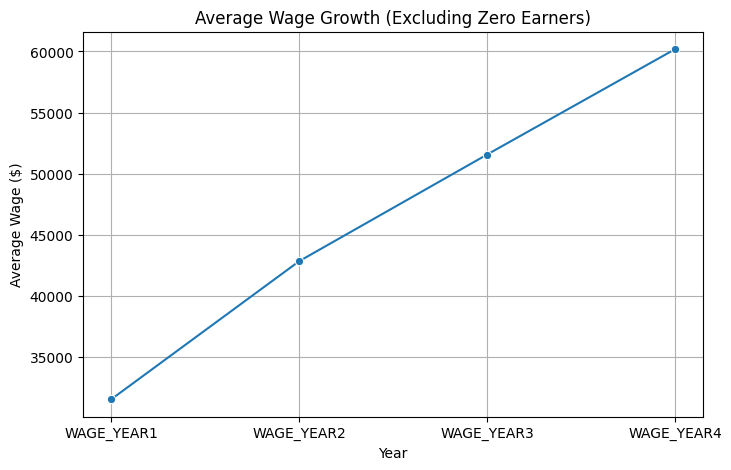

In [174]:
# copy of data set
train_nonzero = train.copy()

# replace 0s with NaN so pandas ignores them in the mean calculations
train_nonzero[["WAGE_YEAR1", "WAGE_YEAR2", "WAGE_YEAR3", "WAGE_YEAR4"]] = (
    train_nonzero[["WAGE_YEAR1", "WAGE_YEAR2", "WAGE_YEAR3", "WAGE_YEAR4"]].replace(0, np.nan))

# calucates average wages
avg_wages_nonzero = train_nonzero[["WAGE_YEAR1", "WAGE_YEAR2", "WAGE_YEAR3", "WAGE_YEAR4"]].mean()

# plot line chart
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_wages_nonzero.index, y=avg_wages_nonzero.values)
plt.title("Average Wage Growth (Excluding Zero Earners)")
plt.xlabel("Year")
plt.ylabel("Average Wage")
plt.grid(True)
plt.show()

In [167]:
#use WAGE_YEAR1-3 as the predictors for year 4
wage_cols = ["WAGE_YEAR1","WAGE_YEAR2","WAGE_YEAR3"]
X = train [wage_cols]

#year 4 will be our target variable
y = train ["WAGE_YEAR4"]

# fills missing values in columns with the mean value of the colums to avoid errors.
X = X.fillna(X.mean())

# split data into training set (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
# creates and trains LR model from sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [169]:
y_pred = model.predict(X_test)
#if training set data = 0 then forces prediction =0 aswell.
mask = (X_test[wage_cols] == 0).all(axis=1)
y_pred[mask] = 0

In [170]:
#Model performace
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2388.482696


In [171]:
# train again on full training data and predict on test dataset
model.fit(X, y)

#prep test dataset
X_test_full = test[wage_cols]
# predict
preds = model.predict(X_test_full)

# apple same zero-wage rule to the test data
mask_test = (X_test_full[wage_cols] == 0).all(axis=1)
preds[mask_test] = 0
# rounds to 2 decimals
preds= np.round(preds,2)


In [172]:
# save predictions to preds.csv
pd.DataFrame({"WAGE_YEAR4": preds}).to_csv("preds.csv", index=False)

print("saved to preds.csv")


saved to preds.csv


Which features best predict the target outcome (WAGE
YEAR4)?


Wage year 1 through 3. most recent earnings were the best predictors of the following year years earnings.


What does your model say about the people or populations whose data is provided?

people with higher past wages will continue to earn higher wages in the following years. but this model doesnt take into account education level, demographics.


What features, if any, would you like to have had to make a better model?

I would have liked it to include Award catagory, as people with higher educations tend to earn more.